## a notebook with analysis


$$
e^{i \pi}
$$

In [18]:
from __future__ import division, print_function
%load_ext autoreload
%autoreload 2

import numpy as np
np.set_printoptions(precision=6, suppress=True)
import os
%matplotlib inline
#%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
phi = (np.sqrt(5)+1)/2
fig_width = 10
figsize = (fig_width, fig_width/phi)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
datadir, tag, subject = 'datadir', '2017-06-16_114935', 'thys'

[  1.497607e+09   1.497607e+09   1.497607e+09 ...,   1.497607e+09
   1.497607e+09   1.497607e+09] [ 584.  459.  379. ...,  941.  941.  925.] [ 540.  573.  627. ...,  430.  459.  459.]


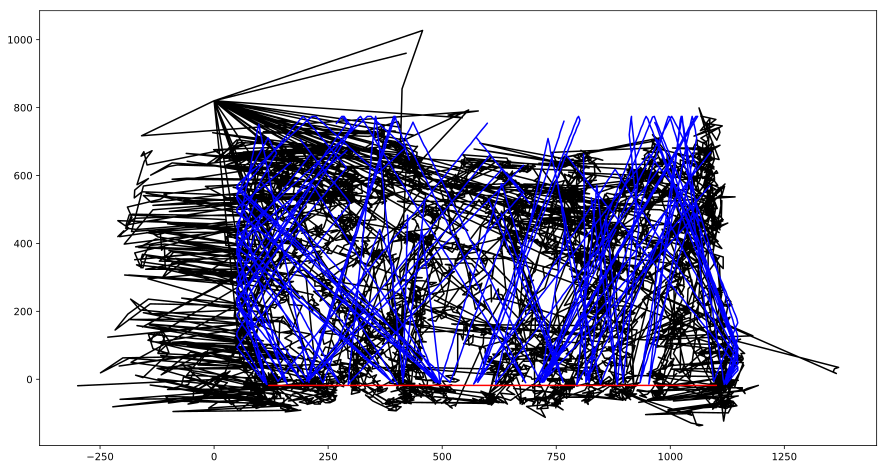

In [34]:
import os
fig, ax = plt.subplots(figsize=(15,8))
time, x, y = {}, {}, {}
for obj, color in zip(['gaze', 'paddle', 'ball'], ['k', 'r', 'b']):
    fname = os.path.join(datadir, tag + '_' + obj + '_' + subject + '.txt')
    
    if obj=='gaze':
        time[obj], x[obj], y[obj] = np.loadtxt(fname, delimiter=';', usecols=(2, 5, 6), unpack=True)#)
        #time, x, y = data[0, :]
        #eT;dT;aT;Fix;State;Rwx;Rwy;Avx;Avy;LRwx;LRwy;LAvx;LAvy;LPSz;LCx;LCy;RRwx;RRwy;RAvx;RAvy;RPSz;RCx;RCy
        #En sachant que le Temps est aT (soit la 3ème colonne)
        #Et que les coordonnées X et Y sont Rwx et Rwy soit la 6ème et 7ème colonne si je ne dis pas de bêtise.
        print(time[obj], x[obj], y[obj])
        time[obj] *= 1000
        #print(x.min(), y.min(), x.max(), y.max())
    else:
        time[obj], x[obj], y[obj] = np.loadtxt(fname, delimiter=';', unpack=True)#, usecols=(0, 2))
    ax.plot(x[obj], 820 - y[obj], c=color)

In [35]:
x['gaze'][0], y['gaze']

(584.0, array([ 540.,  573.,  627., ...,  430.,  459.,  459.]))

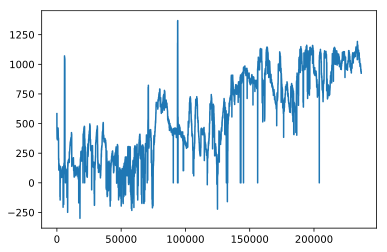

In [36]:
plt.plot(time['gaze']-time['gaze'][0], x['gaze'])

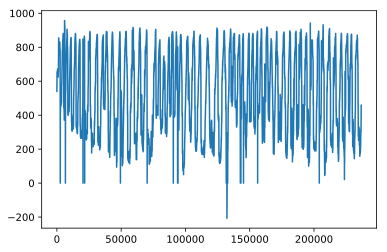

In [37]:
plt.plot(time['gaze']-time['gaze'][0], y['gaze'])

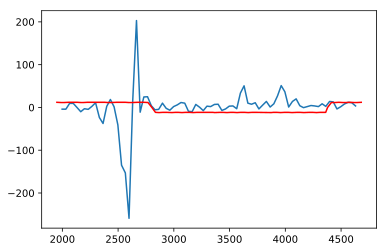

In [47]:
N_start, N_stop = 60, 140
plt.plot(time['gaze'][N_start:N_stop]-time['gaze'][0], np.gradient(y['gaze'])[N_start:N_stop])
N_start, N_stop = 55, 130
plt.plot(time['ball'][N_start:N_stop]-time['ball'][0], np.gradient(y['ball'])[N_start:N_stop], c='r')

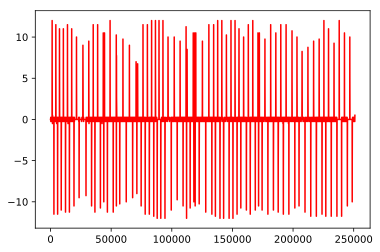

In [56]:

plt.plot(time['ball']-time['ball'][0], np.gradient(np.gradient(y['ball'])), c='r')

In [54]:
np.gradient(np.gradient(y['ball']))[N_start:N_stop] < -4


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

In [50]:
time['ball'][N_start:N_stop] [ np.gradient(np.gradient(y['ball']))[N_start:N_stop] < -2]


array([  1.497607e+12,   1.497607e+12,   1.497607e+12])

In [52]:
time_rebond = time['ball'][N_start:N_stop] [ np.gradient(np.gradient(y['ball']))[N_start:N_stop] > 2].mean()

print(time_rebond)

1.49760658166e+12


In [59]:
seuil = 4
down_rebound_times =  time['ball'] [ np.gradient(np.gradient(y['ball'])) < -seuil] - time['ball'][0]
up_rebound_times =  time['ball'] [ np.gradient(np.gradient(y['ball'])) > seuil] - time['ball'][0]
